### ***Time Series Forcasting Stock Prices of Apple***


In [1]:
# Yahoo Finance
import yfinance as yf
# Others
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
from plotly import graph_objs as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
def get_null_count(df):
    column_names = list(df.columns)
    null_values = list(df.isnull().sum().values) #To calculate the count of null values
    ser = pd.Series(null_values,column_names)
    null_dict = {} #Initialize an empty dictionary to store columns with non-zero null values
    for key, value in ser.items():
      if value !=0: #Iterate through the Series items to filter out columns with non-zero null values
        null_dict[key] = value
    return null_dict


In [3]:
def get_info(dataframe):
  dataframe = dataframe.reset_index() #Reset the index of the DataFrame
  print("Basic information about dataset")
  print("-------------------------------------------------------------------------------------------")
  print(f'dataset contains stock prices from {dataframe["Date"].iloc[0]} to {dataframe["Date"].iloc[-1]}', end='\n\n')
  print(f'Total No. of days : {(dataframe["Date"].iloc[-1] - dataframe["Date"].iloc[0]).days} days', end='\n\n')
  print(f"Number of Rows : {len(dataframe.index)}", end='\n\n')
  print(f"{dataframe.index}", end ="\n\n")
  print(f"Number of columns :{len(dataframe.columns)}", end='\n\n')
  print(f"column Name : {np.array(dataframe.columns)}", end='\n\n')
  print("Columns which has null values : ", get_null_count(dataframe), end='\n\n')
  print("Sample dataset : ", end='\n\n')
  print(dataframe.head(10))


In [7]:

data = yf.Ticker("AAPL")
data = data.history(start="2015-01-01", end="2021-12-31")

In [8]:
get_info(data)

Basic information about dataset
-------------------------------------------------------------------------------------------
dataset contains stock prices from 2015-01-02 00:00:00-05:00 to 2021-12-30 00:00:00-05:00

Total No. of days : 2554 days

Number of Rows : 1762

RangeIndex(start=0, stop=1762, step=1)

Number of columns :8

column Name : ['Date' 'Open' 'High' 'Low' 'Close' 'Volume' 'Dividends' 'Stock Splits']

Columns which has null values :  {}

Sample dataset : 

                       Date       Open       High        Low      Close  \
0 2015-01-02 00:00:00-05:00  24.895680  24.906856  23.992739  24.435270   
1 2015-01-05 00:00:00-05:00  24.202828  24.283288  23.559148  23.746887   
2 2015-01-06 00:00:00-05:00  23.811697  24.010612  23.384811  23.749117   
3 2015-01-07 00:00:00-05:00  23.959210  24.182711  23.847460  24.082136   
4 2015-01-08 00:00:00-05:00  24.412922  25.065542  24.294465  25.007431   
5 2015-01-09 00:00:00-05:00  25.181763  25.311394  24.631953  25.034254   


In [9]:
data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,24.895680,24.906856,23.992739,24.435270,212818400,0.0,0.0
2015-01-05 00:00:00-05:00,24.202828,24.283288,23.559148,23.746887,257142000,0.0,0.0
2015-01-06 00:00:00-05:00,23.811697,24.010612,23.384811,23.749117,263188400,0.0,0.0
2015-01-07 00:00:00-05:00,23.959210,24.182711,23.847460,24.082136,160423600,0.0,0.0
2015-01-08 00:00:00-05:00,24.412922,25.065542,24.294465,25.007431,237458000,0.0,0.0


In [10]:
data.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-23 00:00:00-05:00,173.641889,174.629332,173.069170,174.066483,68356600,0.0,0.0
2021-12-27 00:00:00-05:00,174.866337,178.154525,174.846599,178.065659,74919600,0.0,0.0
2021-12-28 00:00:00-05:00,177.897782,179.053089,176.288245,177.038696,79144300,0.0,0.0
2021-12-29 00:00:00-05:00,177.078219,178.361898,175.903159,177.127594,62348900,0.0,0.0
2021-12-30 00:00:00-05:00,177.216429,178.302622,175.853752,175.962372,59773000,0.0,0.0


In [11]:
#Implementing trading strategy
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [12]:
y

array([-1,  1,  1, ...,  1, -1, -1])

In [13]:
data.shape

(1762, 7)

In [14]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

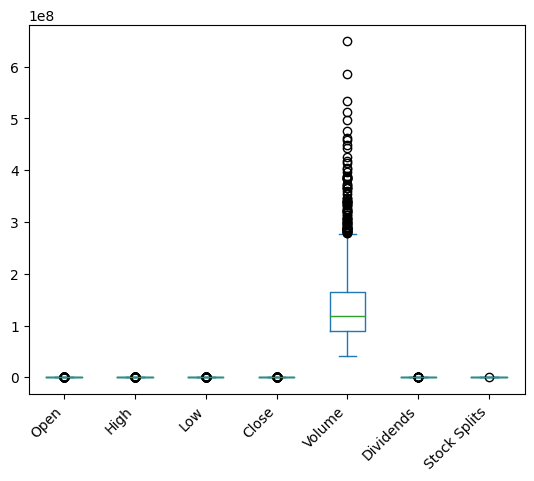

In [15]:
ax = data.plot(kind='box')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

<Axes: >

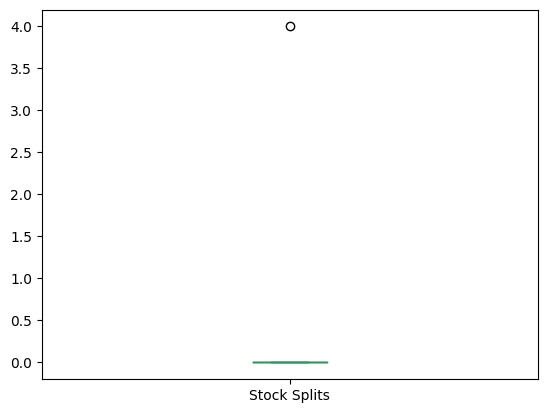

In [16]:
data['Stock Splits'].plot(kind='box')


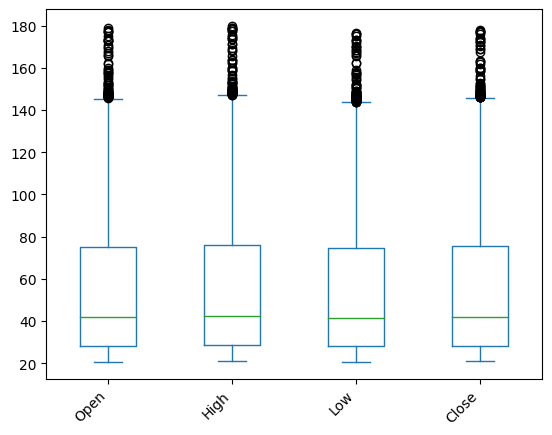

In [17]:
ax = data[[ 'Open', 'High', 'Low', 'Close']].plot(kind='box')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

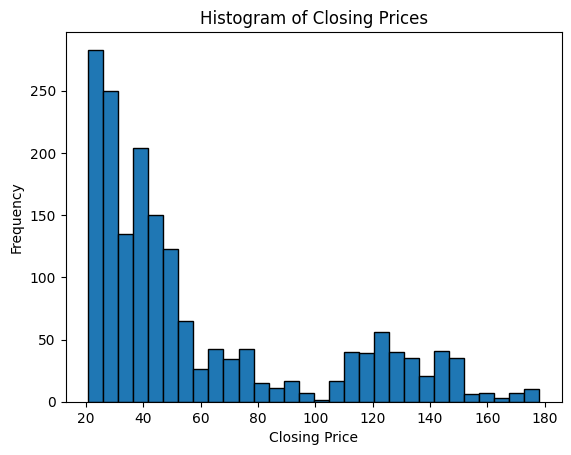

In [18]:
plt.hist(data['Close'], bins=30, edgecolor='black')

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices')

plt.show()

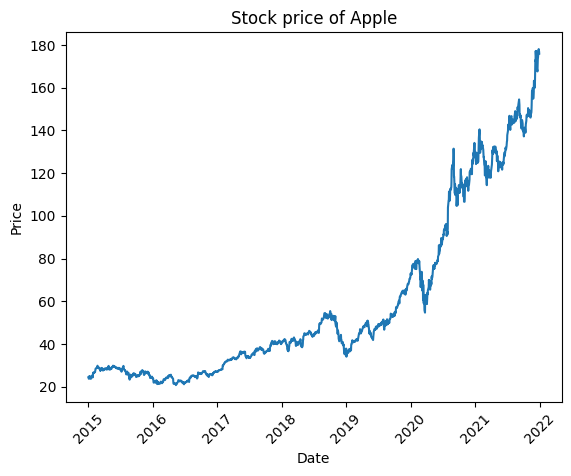

In [19]:
plt.plot(data['Close'])
plt.xticks(rotation= 45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock price of Apple')

plt.show()

In [20]:
#Dropping NaN values and unnecessary columns
data.dropna(inplace=True)


In [21]:
#Adjusting lengths of X and y
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[:-1]
y = y[:-1]

In [22]:
X

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00-05:00,24.895680,24.906856,23.992739,24.435270,212818400
2015-01-05 00:00:00-05:00,24.202828,24.283288,23.559148,23.746887,257142000
2015-01-06 00:00:00-05:00,23.811697,24.010612,23.384811,23.749117,263188400
2015-01-07 00:00:00-05:00,23.959210,24.182711,23.847460,24.082136,160423600
2015-01-08 00:00:00-05:00,24.412922,25.065542,24.294465,25.007431,237458000
...,...,...,...,...,...
2021-12-22 00:00:00-05:00,170.867196,173.651794,169.988372,173.434555,92135300
2021-12-23 00:00:00-05:00,173.641889,174.629332,173.069170,174.066483,68356600
2021-12-27 00:00:00-05:00,174.866337,178.154525,174.846599,178.065659,74919600


In [23]:
y

array([-1,  1,  1, ..., -1,  1, -1])

In [24]:
#Splitting data into training and test datasets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Using RandomForest and DecisionTree Classifiers.
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()

In [26]:
#Fitting the model in the training set.
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
#Making predictions
rf_predictions = rf_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

In [28]:
#Calculating the Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [29]:

# Confusion matrices
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

In [30]:
# Printing confusion matrices
print("Random Forest Classifier Confusion Matrix:")
print(rf_conf_matrix)

print("\nDecision Tree Classifier Confusion Matrix:")
print(dt_conf_matrix)

Random Forest Classifier Confusion Matrix:
[[ 66  96]
 [ 70 121]]

Decision Tree Classifier Confusion Matrix:
[[ 75  87]
 [ 81 110]]


True Positive (TP): The number of observations that were correctly predicted as positive (buy).
True Negative (TN): The number of observations that were correctly predicted as negative (sell).
False Positive (FP): The number of observations that were incorrectly predicted as positive (buy) when they were actually negative (sell).
False Negative (FN): The number of observations that were incorrectly predicted as negative (sell) when they were actually positive (buy).

Considering these metrics, we can conclude the following:

*   Decision Tree Classifier has higher TPR (108 vs. 102) and TNR (90 vs. 89) compared to the Random Forest Classifier. This indicates that the Decision Tree Classifier performs slightly better in correctly predicting both "buy" and "sell" signals.

*   Additionally, the Decision Tree Classifier has a lower FPR (88 vs. 89) and FNR (67 vs. 73) compared to the Random Forest Classifier, which further supports its better performance in this scenario.



In [31]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

          -1       0.49      0.41      0.44       162
           1       0.56      0.63      0.59       191

    accuracy                           0.53       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.53      0.52       353



In [32]:
print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier:
              precision    recall  f1-score   support

          -1       0.48      0.46      0.47       162
           1       0.56      0.58      0.57       191

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353



In [33]:
# Comparing classifiers
print("\nComparison of Classifiers:")
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Decision Tree Classifier Accuracy: {dt_accuracy}")


Comparison of Classifiers:
Random Forest Classifier Accuracy: 0.5297450424929179
Decision Tree Classifier Accuracy: 0.5240793201133145


The Decision Tree Classifier has higher Accuracy, precision and recall and F1 score as compared to the Random Forest Classifier.
In Conclusion, after considering all the metrics, The Decision Tree Classifier
 fits the best as it performs slightly better than the Random Forest Classifier.